In [33]:
import json
with open("memory_usage_history_141gb.json", "r") as f:
    memory_usage_history = json.load(f)

batch_sizes = list(memory_usage_history.keys())
max_lengths = list(memory_usage_history[batch_sizes[0]].keys())

for batch_size in batch_sizes:
    for max_length in max_lengths:
        try:
            print(memory_usage_history[batch_size][max_length]['current_gpu_memory_gb'])
        except:
            print(f"No data for batch_size: {batch_size}, max_length: {max_length}")

3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
3.045607566833496
No data for batch_size: 16, max_length: 1024
3.045607566833496
3.045607566833496
No data for batch_size: 32, max_length: 512
No data for batch_size: 32, max_length: 1024
3.045607566833496
No data for batch_size: 64, max_length: 256
No data for batch_size: 64, max_length: 512
No data for batch_size: 64, max_length: 1024
No data for batch_size: 128, max_length: 128
No data for batch_size: 128, max_length: 256
No data for batch_size: 128, max_length: 512
No data for batch_size: 128, max_length: 1024


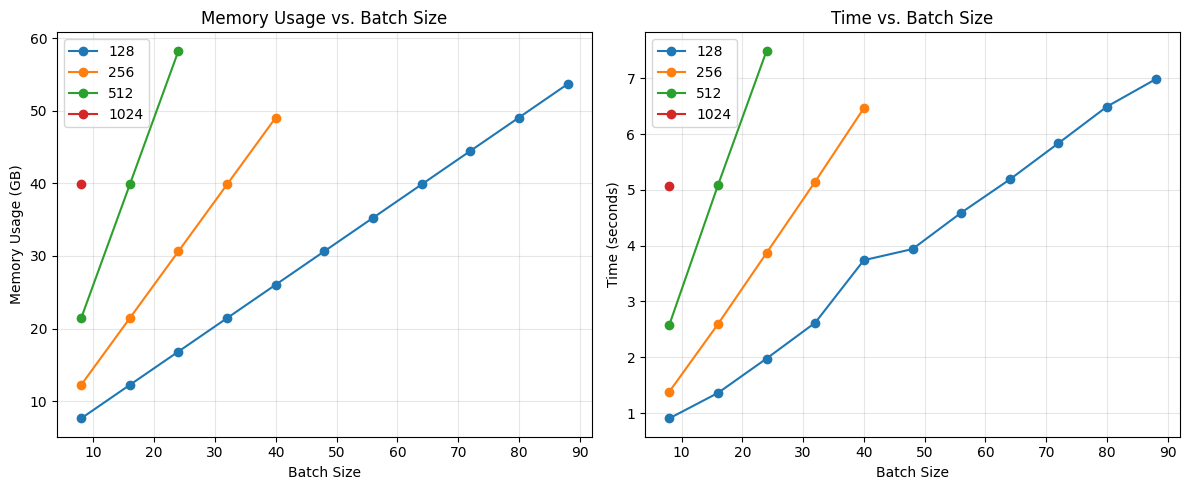

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import json
with open("memory_usage_history_141gb.json", "r") as f:
    memory_usage_history = json.load(f)

batch_sizes = list(memory_usage_history.keys())
max_lengths = list(memory_usage_history[batch_sizes[0]].keys())

batch_size_int = np.array([int(batch_size) for batch_size in batch_sizes])
max_length_int = np.array([int(max_length) for max_length in max_lengths])
memory_data = np.zeros((len(batch_sizes), len(max_lengths)))
time_data = np.zeros((len(batch_sizes), len(max_lengths)))

for i, batch_size in enumerate(batch_sizes):
    for j, max_length in enumerate(max_lengths):
        # print(f"batch_size: {batch_size}, max_length: {max_length}")
        try:
            memory_data[i, j] = memory_usage_history[batch_size][max_length]['measurements'][-1]['memory_used_gb']
            time_data[i, j] = memory_usage_history[batch_size][max_length]['measurements'][-1]['time']
        except:
            memory_data[i, j] = np.nan
            time_data[i, j] = np.nan
        # print("-" * 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Memory usage subplot
for j, max_length in enumerate(max_lengths):
    ax1.plot(batch_size_int, memory_data[:, j], label=max_length, marker='o')
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Memory Usage (GB)')
ax1.set_title('Memory Usage vs. Batch Size')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Time subplot
for j, max_length in enumerate(max_lengths):
    ax2.plot(batch_size_int, time_data[:, j], label=max_length, marker='o')
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Time vs. Batch Size')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Thus the oprimal configuration seems to be `batch_size = 24` and `max_length = 512`.